In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = load_breast_cancer()

In [3]:
X = data['data']
y = data['target']

In [5]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, shuffle= True, random_state=42)

In [9]:
model = LogisticRegression()

In [11]:
kf = KFold(n_splits=5, shuffle = False)
X_train , X_test, y_train, y_test = [], [], [], []
for train_index, test_index in kf.split(X_scaled):
    X_fold_train, X_fold_test = X_scaled[train_index], X_scaled[test_index]
    y_fold_train, y_fold_test = y[train_index], y[test_index]
    X_train.append(X_fold_train)
    X_test.append(X_fold_test)
    y_train.append(y_fold_train)
    y_test.append(y_fold_test)
    

In [17]:
results = []
test_accuracy = []
test_precision = []
test_recall = []
test_f1 = []
for i in range(5):
    model = LogisticRegression()
    model.fit(X_train[i], y_train[i])
    y_pred = model.predict(X_test[i])
    acc = accuracy_score(y_test[i], y_pred)
    pre = precision_score(y_test[i], y_pred)
    rec = recall_score(y_test[i], y_pred)
    f1s = f1_score(y_test[i], y_pred)
    test_accuracy.append(acc)
    test_precision.append(pre)
    test_recall.append(rec)
    test_f1.append(f1s)

results = {
        'test_accuracy' : test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1,
}     

In [18]:
results

{'test_accuracy': [0.8947368421052632,
  0.9649122807017544,
  0.9736842105263158,
  0.9824561403508771,
  0.9734513274336283],
 'test_precision': [0.7931034482758621,
  0.9420289855072463,
  0.961038961038961,
  0.9882352941176471,
  0.9772727272727273],
 'test_recall': [1.0, 1.0, 1.0, 0.9882352941176471, 0.9885057471264368],
 'test_f1': [0.8846153846153846,
  0.9701492537313433,
  0.9801324503311258,
  0.9882352941176471,
  0.9828571428571429]}

In [23]:
from matplotlib import pyplot as plt
import numpy as np

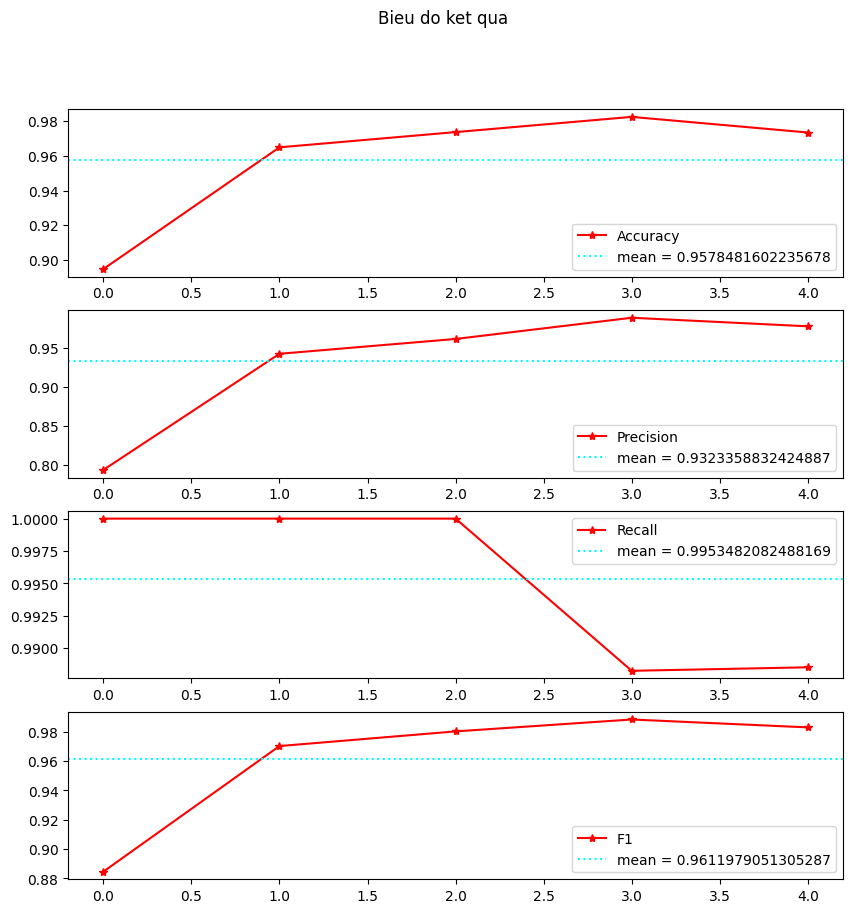

In [26]:
fig, axs = plt.subplots(4,1, figsize = (10, 10))
metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
titles = ['Accuracy', 'Precision', 'Recall', 'F1']
fig.suptitle('Bieu do ket qua')
for i, metric in enumerate(metrics):
    score = results[metric]
    axs[i].plot(score, color = 'red', marker = '*', linestyle = '-', label = f'{titles[i]}')
    axs[i].axhline(y = np.mean(score), color = 'cyan', linestyle = ':', label = f'mean = {np.mean(score)}')
    axs[i].legend()